# Pricing an option
Here we will construct a lazy pricer for a vanilla european option

In [1]:
import numpy as np
import sympy as sy
from IPython.display import display, HTML
from sympy.stats import Normal as syNormal, cdf
sy.init_printing()

In [2]:
# adapted from https://gist.github.com/raddy/bd0e977dc8437a4f8276
#spot, strike, vol, days till expiry, interest rate, call or put (1,-1)
spot, strike, vol, dte, rate, cp = sy.symbols('spot strike vol dte rate cp')

T = dte / 260.
N = syNormal('N', 0.0, 1.0)

d1 = (sy.ln(spot / strike) + (0.5 * vol ** 2) * T) / (vol * sy.sqrt(T))
d2 = d1 - vol * sy.sqrt(T)

TimeValueExpr = sy.exp(-rate * T) * (cp * spot * cdf(N)(cp * d1) - cp * strike  * cdf(N)(cp * d2))

Let's take a look at the sympy expression

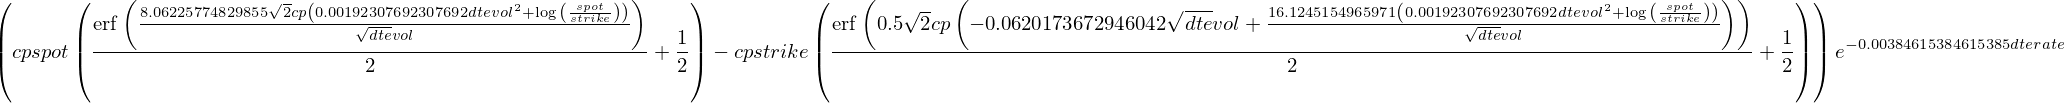

In [3]:
TimeValueExpr

## Construct lazy grapy
Now using `tributary`, we construct a lazily-evaluated graph

In [4]:
import tributary.symbolic as ts
PriceClass = ts.construct_lazy(TimeValueExpr)

In [5]:
price = PriceClass(spot=210.59, strike=205, vol=14.04, dte=4, rate=.2175, cp=-1)

In [6]:
price.evaluate()()

In [7]:
price.strike = 210
price.evaluate()()

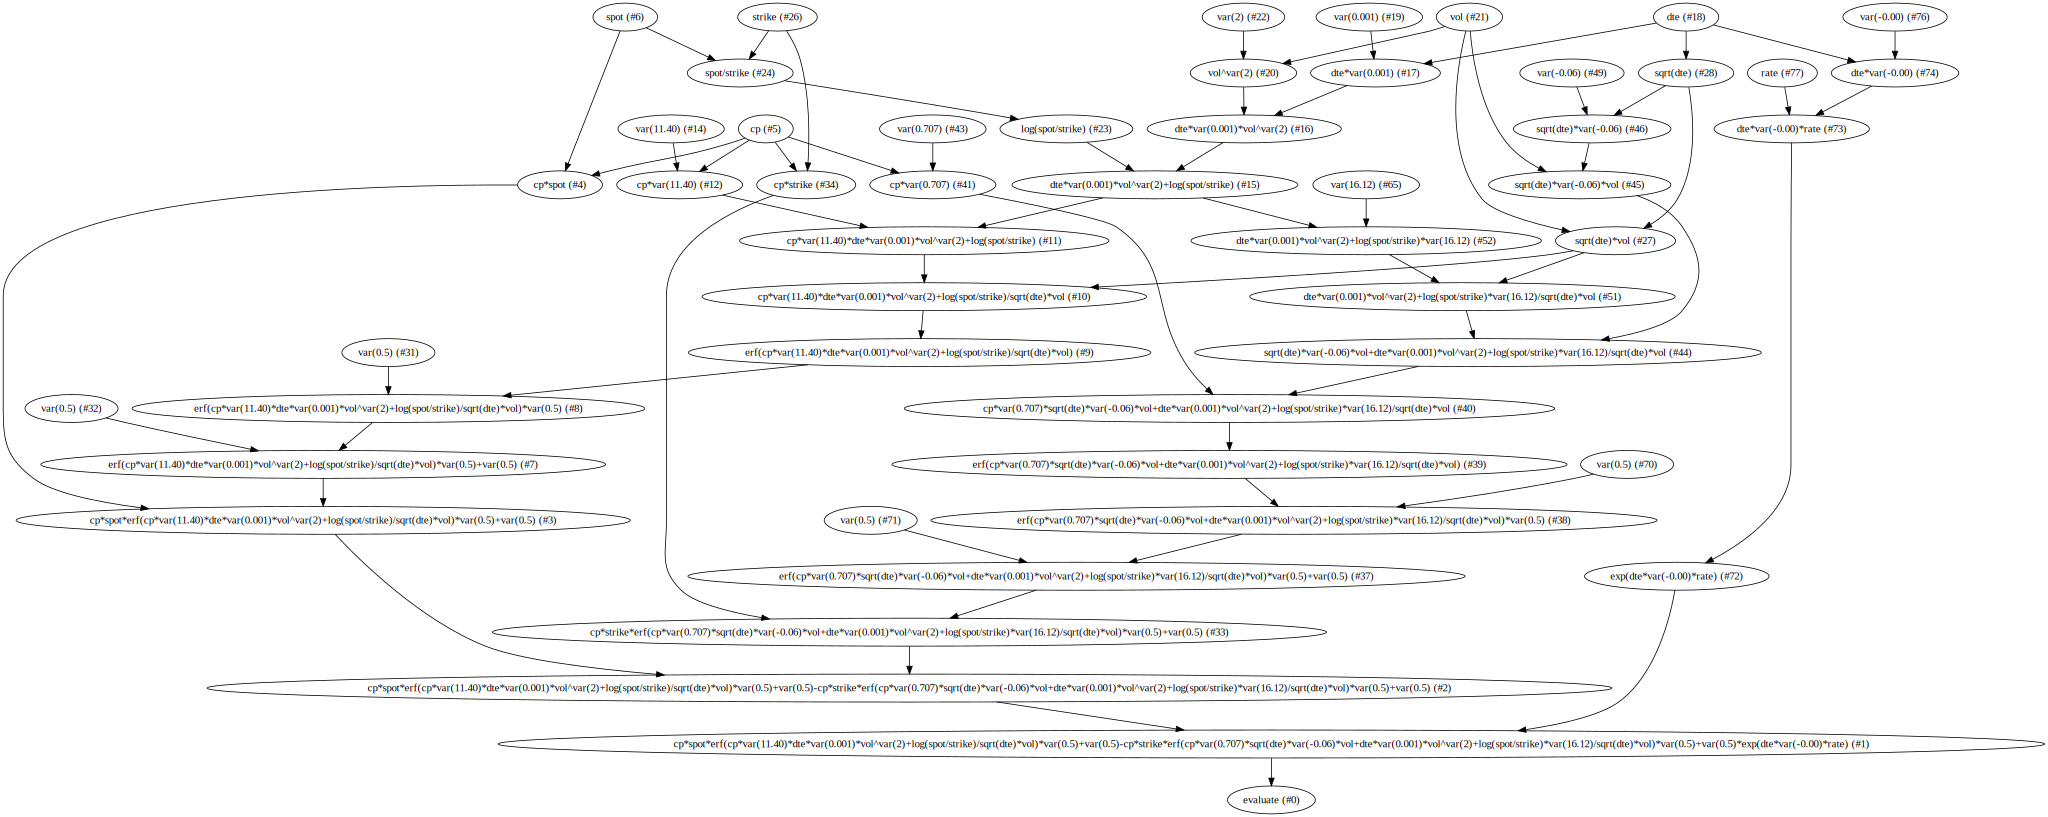

In [8]:
price.evaluate().graphviz()

## Visualizing the dirty nodes
If we adjust an input, we can see the nodes that will be recalculated on next evaluation

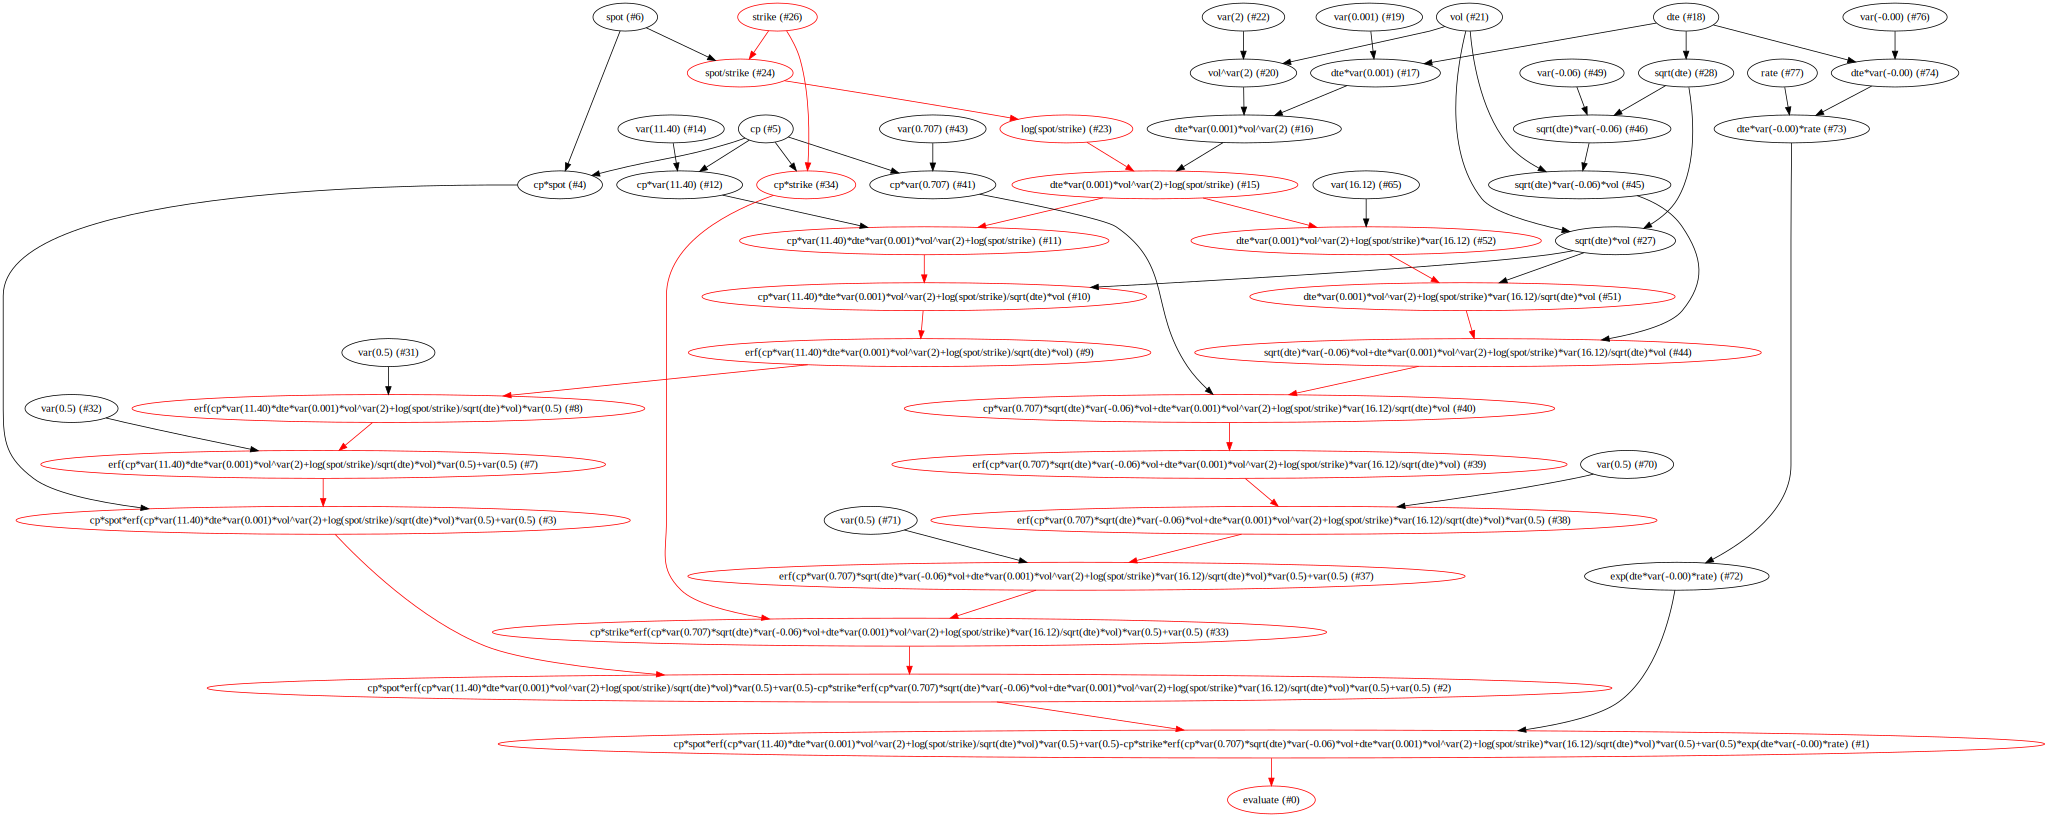

In [9]:
price.strike = 205
price.evaluate().graphviz()

# Lazy Greeks
(work in progress)

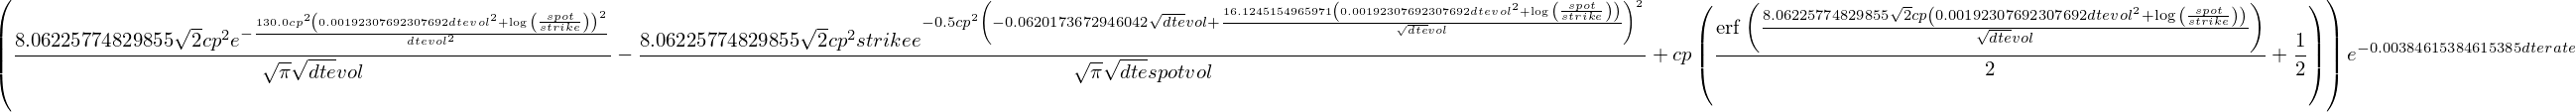

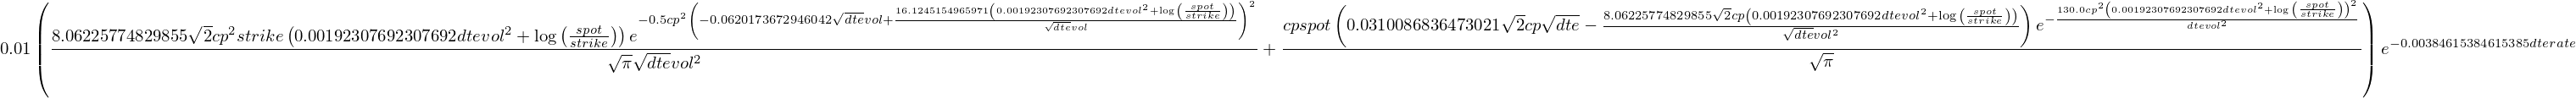

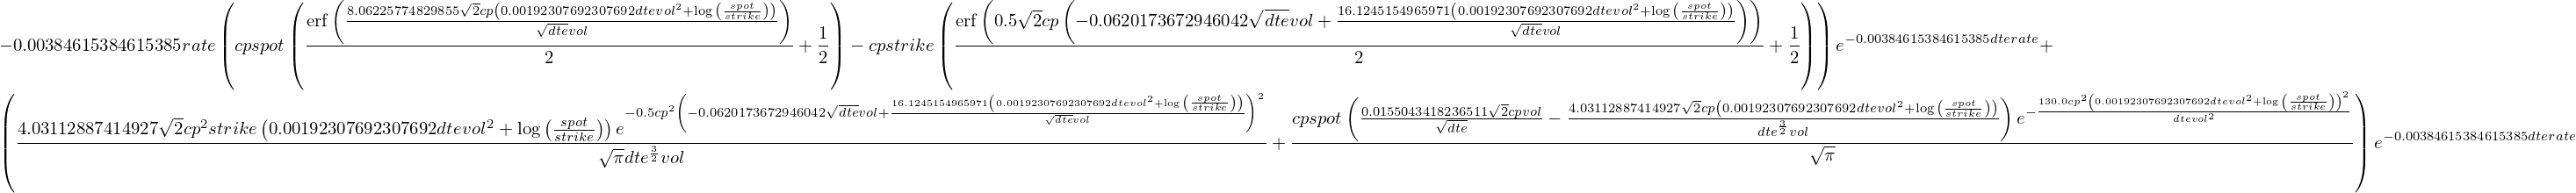

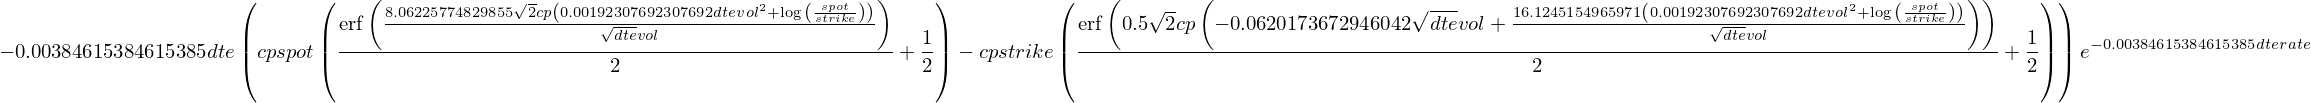

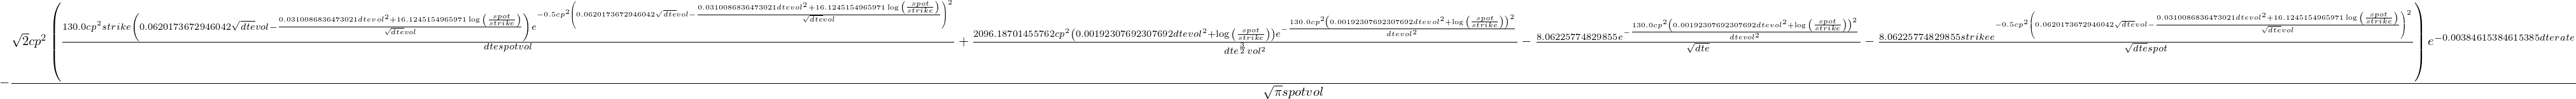

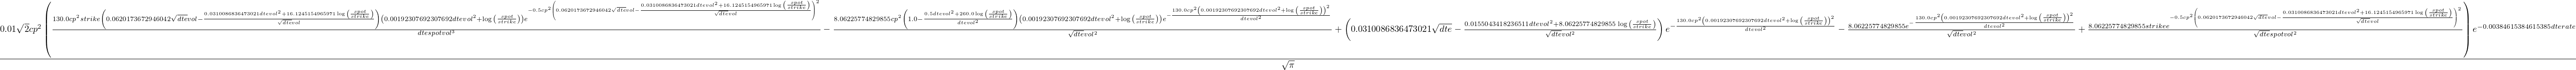

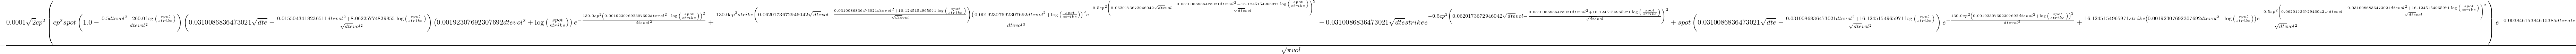

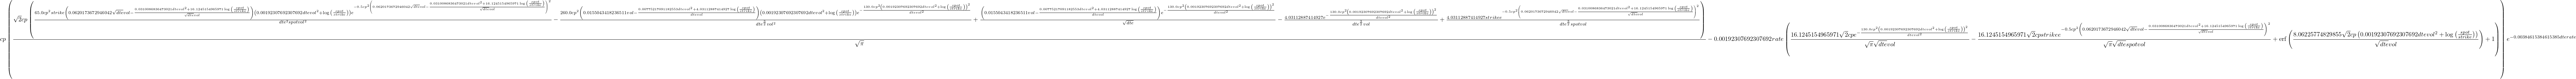

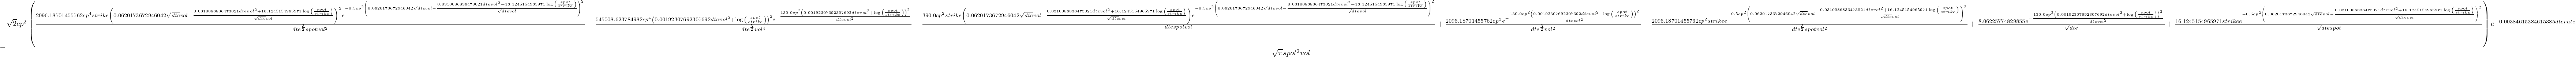

In [10]:
#1st Order Greeks
DeltaExpr = TimeValueExpr.diff(spot)
display(HTML("<h1>Delta</h1>"))
display(DeltaExpr)
DeltaClass = ts.construct_lazy(DeltaExpr)

VegaExpr = TimeValueExpr.diff(vol)/100.
display(HTML("<h1>Vega</h1>"))
display(VegaExpr)
VegaClass = ts.construct_lazy(VegaExpr)

ThetaExpr = TimeValueExpr.diff(dte)
display(HTML("<h1>Theta</h1>"))
display(ThetaExpr)
ThetaClass = ts.construct_lazy(ThetaExpr)


RhoExpr = TimeValueExpr.diff(rate)
display(HTML("<h1>Rho</h1>"))
display(RhoExpr)
RhoClass = ts.construct_lazy(RhoExpr)

#2nd Order Greeks
GammaExpr = TimeValueExpr.diff(spot,spot)
display(HTML("<h1>Gamma</h1>"))
display(GammaExpr)
GammaClass = ts.construct_lazy(GammaExpr)

VannaExpr = TimeValueExpr.diff(spot,vol)/100.
display(HTML("<h1>Vanna</h1>"))
display(VannaExpr)
VannaClass = ts.construct_lazy(VannaExpr)

VommaExpr = TimeValueExpr.diff(vol,vol)/1e4
display(HTML("<h1>Vomma</h1>"))
display(VommaExpr)
VommaClass = ts.construct_lazy(VommaExpr)

CharmExpr = TimeValueExpr.diff(spot,dte)
display(HTML("<h1>Charm</h1>"))
display(CharmExpr)
CharmClass = ts.construct_lazy(CharmExpr)

#3rd Order
SpeedExpr = TimeValueExpr.diff(spot,3)
display(HTML("<h1>Speed</h1>"))
display(SpeedExpr)
SpeedClass = ts.construct_lazy(SpeedExpr)

# Woah! Lets take a look at one of these
Vanilla european put option, speed calculation

|Field| Value|
|--|--|
|spot price|`210.59`|
|strike price|`205`|
|volatility|`14.04`|
|days until expiry|4|
|risk free rate|.2175|
    

In [11]:
speed = SpeedClass(spot=210.59, strike=205, vol=14.04, dte=4, rate=.2175, cp=-1)
speed.evaluate()()

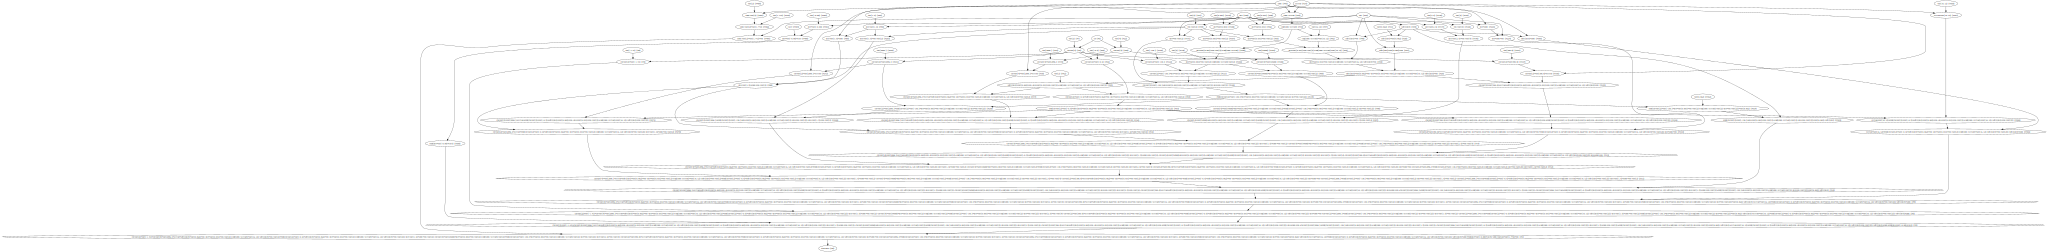

In [12]:
speed.evaluate().graphviz()

## If we change the strike, what calculations should be redone?

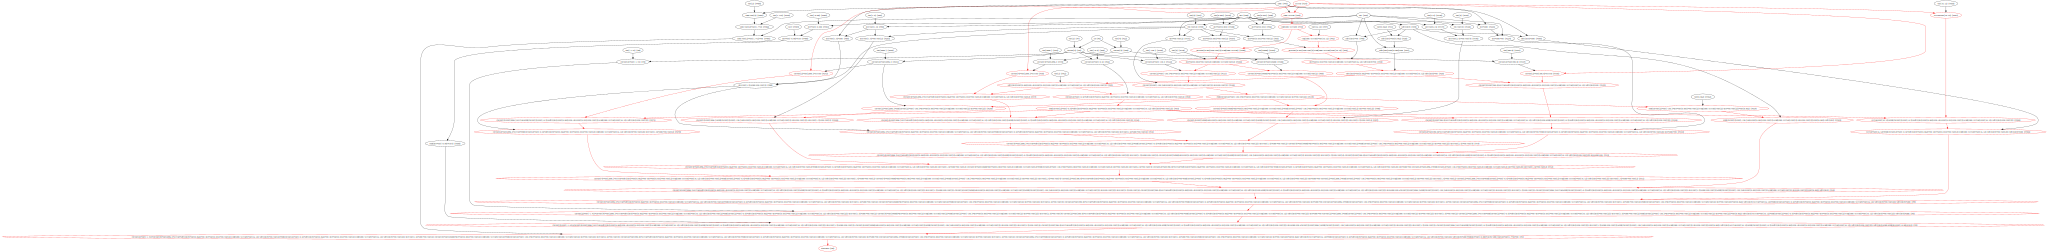

In [13]:
speed.strike = 200
speed.evaluate().graphviz()

## And lets evaluate it now

In [14]:
speed.evaluate()()